In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as stats

In [3]:
# image imports
from skimage import io, filters, color,exposure,feature,measure,segmentation
from scipy import ndimage
import cv2 

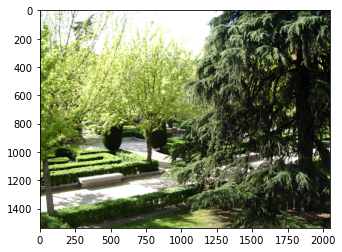

In [29]:
image_path = 'sample_images/Spain 067.JPG'
color_img = cv2.imread(image_path,1)
plt.imshow(cv2.cvtColor(color_img,cv2.COLOR_BGR2RGB))

In [31]:
from sklearn.cluster import MiniBatchKMeans

In [171]:
random.choice(os.listdir('sample_images'))

'DSCN2426.JPG'

In [174]:
class goal_tracking_imgs:
    """
        This is the image class for the color by number goal tracker
        
        Dependencies: os,random,openCV,numpy,sklearn
    """
    def __init__(self,num_goals,img_path):
        self.k = num_goals
        self.img_path = img_path
        self.img = None
        self.goal_img = None
    
    def get_image(self):
        # Gets a random image from the image path
        img_string = random.choice(os.listdir(self.img_path))
#         return img_string
        img = cv2.imread(self.img_path+'/'+img_string,1)
        # downsample
        width = int(img.shape[1]*200/img.shape[1])
        height = int(img.shape[0]*200/img.shape[1])
        
        self.img = cv2.resize(img, (width,height))
        self.goal_img = 255*np.ones(shape = self.img.shape, dtype = np.uint8)
    
    def prepare_image(self):
        # convert the image to L*a*b color space, where distance is more relevant
        test_img = cv2.cvtColor(self.img,cv2.COLOR_BGR2LAB)
        # flatten across spatial information to create a color feature vector
        self.img_vector = test_img.reshape((test_img.shape[0] * test_img.shape[1]),3)
    
    def get_clusters(self):
        # Get the cluster assignments for each pixel
        # initialize the clustering algorithm
        cluster = MiniBatchKMeans(n_clusters = self.k)
        # perform clustering on the L*a*b vector
        self.labels = cluster.fit_predict(self.img_vector)
        self.quants = cluster.cluster_centers_.astype("uint8")[self.labels]
        # reshape
        self.labels = self.labels.reshape((self.img.shape[0],self.img.shape[1]))
        self.quants = self.quants.reshape((self.img.shape[0],self.img.shape[1],3))
        # convert to BGR
        self.quants = cv2.cvtColor(self.quants, cv2.COLOR_LAB2BGR)
        
    def fill_goals(self,goals_list):
        for n in goals_list:
            if type(n) != int:
                raise Exception("Goals must be integers")
            if n > np.max(self.labels):
                raise Exception("Goal # exceeds number of clusters. Please re-initialize with accurate # of goals")
                
            self.goal_img[self.labels==n,:] = self.quants[self.labels==n,:]
        
    def show_image(self):
        plt.imshow(cv2.cvtColor(self.goal_img,cv2.COLOR_BGR2RGB))

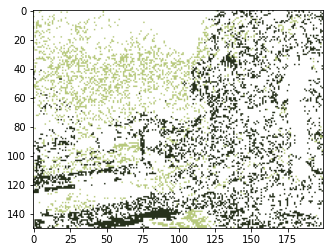

In [183]:
test_class = goal_tracking_imgs(8,'sample_images')
test_class.get_image()
test_class.prepare_image()
test_class.get_clusters()
test_class.fill_goals([0,1])
test_class.show_image()

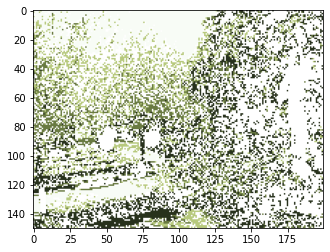

In [184]:
test_class.fill_goals([2,3])
test_class.show_image()

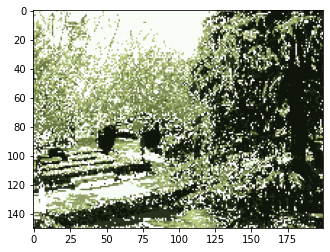

In [185]:
test_class.fill_goals([4,5])
test_class.show_image()

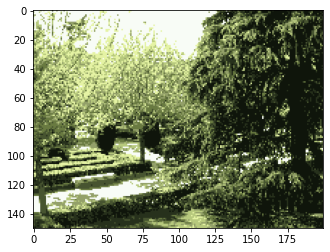

In [186]:
test_class.fill_goals([6,7])
test_class.show_image()